In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow と tf.keras のインポート
import tensorflow as tf
from tensorflow import keras

# シードの固定
import os
import random

def reset_seed(seed=0):

    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed) #　random関数のシードを固定
    np.random.seed(seed) #numpyのシードを固定
    tf.random.set_seed(seed) #tensorflowのシードを固定

print(tf.__version__)

2.0.0


In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(train_x, train_t), (val_x, val_t) = cifar10.load_data()

In [4]:
len(train_x), len(val_x), len(train_t), len(val_t)

(50000, 10000, 50000, 10000)

In [5]:
train_x.shape

(50000, 32, 32, 3)

In [6]:
type(train_x)

numpy.ndarray

In [7]:
train_x.dtype

dtype('uint8')

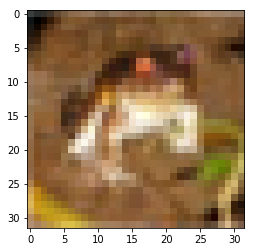

In [8]:
plt.imshow(train_x[0])

In [9]:
train_t.shape

(50000, 1)

In [10]:
type(train_t)

numpy.ndarray

In [11]:
train_t.dtype

dtype('uint8')

In [12]:
train_t[0]

array([6], dtype=uint8)

In [13]:
train_t.shape

(50000, 1)

In [14]:
train_x[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [15]:
# 特徴量の正規化
train_x = train_x / 255
val_x = val_x / 255

In [16]:
train_x[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [17]:
# sparse_catergorical_crossentropy にすると自動的に One-hot 表現にされる。
# sparse というところが味噌。
# --> したがって、今は one-hot 表現にわざわざ to_categorical を使って変える必要なし
# https://10001ideas.com/2018/10/10/batch-normalization-%E3%81%A8-dropout-%E3%81%AF%E4%BD%B5%E7%94%A8%E3%81%97%E3%81%AA%E3%81%84%E6%96%B9%E3%81%8C%E8%89%AF%E3%81%84%E3%81%A8%E3%81%84%E3%81%86%E8%A9%B1/

In [18]:
from tensorflow.keras import models, layers

In [19]:
# Batch Normalization と Dropout は一緒にしないほうがいいが、回避策としては、
# BN -> DO の順に行うこと。というのも、DO は過学習を起こさないために、指定した割合で
# ノードを消して NN を行うが、DO を先にやってしまうと、そのフルノードでない状態で、
# BN が行われ、accuracy や loss にフラップが発生する。どちらもやってもいいが、
# BN だけでいいのでは？というのが最近の傾向らしい

In [20]:
reset_seed(0)

model = models.Sequential()

model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same', 
                        input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))

model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))

model.add(layers.Conv2D(192, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])

In [21]:
model.fit(train_x, train_t,
         batch_size=1024,
         epochs=50,
         verbose=1,
         validation_data=(val_x, val_t))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 24s 486us/sample - loss: 1.5977 - accuracy: 0.4427 - val_loss: 2.3910 - val_accuracy: 0.1001
Epoch 2/50
50000/50000 [==============================] - 23s 451us/sample - loss: 1.1441 - accuracy: 0.5956 - val_loss: 2.6708 - val_accuracy: 0.1005
Epoch 3/50
50000/50000 [==============================] - 23s 450us/sample - loss: 0.9600 - accuracy: 0.6626 - val_loss: 2.9254 - val_accuracy: 0.1004
Epoch 4/50
50000/50000 [==============================] - 22s 449us/sample - loss: 0.8062 - accuracy: 0.7188 - val_loss: 3.0117 - val_accuracy: 0.1355
Epoch 5/50
50000/50000 [==============================] - 23s 452us/sample - loss: 0.6785 - accuracy: 0.7656 - val_loss: 2.9027 - val_accuracy: 0.2210
Epoch 6/50
50000/50000 [==============================] - 23s 450us/sample - loss: 0.5626 - accuracy: 0.8070 - val_loss: 2.5130 - val_accuracy: 0.2989
Epoch 7/50
50000/50000 [====================

In [22]:
results = pd.DataFrame(model.history.history)

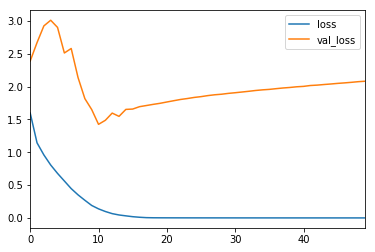

In [23]:
results[['loss', 'val_loss']].plot()

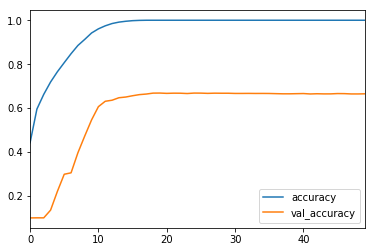

In [24]:
results[['accuracy', 'val_accuracy']].plot()

In [25]:
results[['accuracy', 'val_accuracy']].tail()

,accuracy,val_accuracy
45,1.0,0.6662
46,1.0,0.6659
47,1.0,0.6645
48,1.0,0.6645
49,1.0,0.6651


In [27]:
reset_seed(0)

model = models.Sequential()

model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same', 
                        input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))

model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))

model.add(layers.Conv2D(192, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])

In [28]:
model.fit(train_x, train_t,
         batch_size=1024,
         epochs=30,
         verbose=1,
         validation_data=(val_x, val_t))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 29s 581us/sample - loss: 2.3275 - accuracy: 0.2781 - val_loss: 2.4233 - val_accuracy: 0.1132
Epoch 2/30
50000/50000 [==============================] - 27s 543us/sample - loss: 1.7380 - accuracy: 0.3966 - val_loss: 2.9770 - val_accuracy: 0.1025
Epoch 3/30
50000/50000 [==============================] - 27s 544us/sample - loss: 1.5148 - accuracy: 0.4667 - val_loss: 3.4166 - val_accuracy: 0.1140
Epoch 4/30
50000/50000 [==============================] - 27s 543us/sample - loss: 1.3920 - accuracy: 0.5062 - val_loss: 3.8716 - val_accuracy: 0.1416
Epoch 5/30
50000/50000 [==============================] - 27s 542us/sample - loss: 1.2928 - accuracy: 0.5413 - val_loss: 3.6346 - val_accuracy: 0.2186
Epoch 6/30
50000/50000 [==============================] - 27s 544us/sample - loss: 1.2084 - accuracy: 0.5703 - val_loss: 3.5327 - val_accuracy: 0.2148
Epoch 7/30
50000/50000 [====================

In [29]:
results = pd.DataFrame(model.history.history)

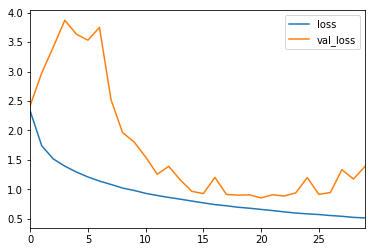

In [30]:
results[['loss', 'val_loss']].plot()

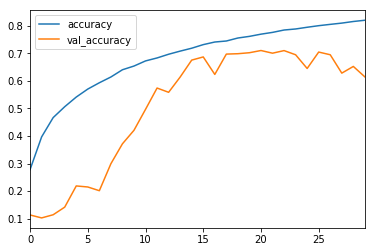

In [31]:
results[['accuracy', 'val_accuracy']].plot()

In [32]:
results[['accuracy', 'val_accuracy']].tail()

,accuracy,val_accuracy
25,0.80036,0.7046
26,0.80514,0.6948
27,0.80972,0.6281
28,0.81556,0.6524
29,0.82010,0.6145


In [33]:
reset_seed(0)

model = models.Sequential()

model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same', 
                        input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))

model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))

model.add(layers.Conv2D(192, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.35))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])

In [34]:
model.fit(train_x, train_t,
         batch_size=1024,
         epochs=30,
         verbose=1,
         validation_data=(val_x, val_t))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 29s 578us/sample - loss: 2.1390 - accuracy: 0.2995 - val_loss: 2.4103 - val_accuracy: 0.1000
Epoch 2/30
50000/50000 [==============================] - 27s 544us/sample - loss: 1.6368 - accuracy: 0.4233 - val_loss: 3.1010 - val_accuracy: 0.1000
Epoch 3/30
50000/50000 [==============================] - 27s 542us/sample - loss: 1.4425 - accuracy: 0.4847 - val_loss: 3.6059 - val_accuracy: 0.1000
Epoch 4/30
50000/50000 [==============================] - 27s 544us/sample - loss: 1.3180 - accuracy: 0.5316 - val_loss: 3.8008 - val_accuracy: 0.1141
Epoch 5/30
50000/50000 [==============================] - 27s 541us/sample - loss: 1.2255 - accuracy: 0.5629 - val_loss: 3.4333 - val_accuracy: 0.1727
Epoch 6/30
50000/50000 [==============================] - 27s 545us/sample - loss: 1.1446 - accuracy: 0.5909 - val_loss: 3.3617 - val_accuracy: 0.1763
Epoch 7/30
50000/50000 [====================

In [35]:
results = pd.DataFrame(model.history.history)

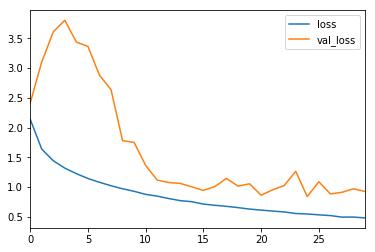

In [36]:
results[['loss', 'val_loss']].plot()

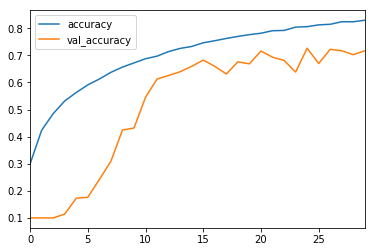

In [37]:
results[['accuracy', 'val_accuracy']].plot()

In [38]:
results[['accuracy', 'val_accuracy']].tail()

,accuracy,val_accuracy
25,0.81248,0.6698
26,0.81464,0.7223
27,0.82398,0.7168
28,0.82400,0.7025
29,0.82954,0.7169


In [48]:
# モデルの構築

# ブロック 1
inputs = keras.Input(shape=(32, 32, 3), name='img')
x = layers.Conv2D(32, 3, activation='relu')(inputs)
x = layers.Conv2D(64, 3, activation='relu')(x)
block_1_output = layers.MaxPooling2D(3)(x)

# ブロック 2
x = layers.Conv2D(64, 3, activation='relu', padding='same')(block_1_output)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_2_output = layers.add([x, block_1_output]) # 1 つ目のブロックの出力値を加算

# ブロック 3
x = layers.Conv2D(64, 3, activation='relu', padding='same')(block_2_output)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_3_output = layers.add([x, block_2_output]) # 2 つ目のブロックの出力値を加算

# 最終ブロック
x = layers.Conv2D(64, 3, activation='relu')(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs, outputs, name='resnet') # まねた

In [49]:
optimizer = keras.optimizers.Adam()
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
model.fit(train_x, train_t,
         batch_size=1024,
         epochs=30,
         verbose=1,
         validation_data=(val_x, val_t))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 57s 1ms/sample - loss: 2.1246 - accuracy: 0.1847 - val_loss: 1.8493 - val_accuracy: 0.2950
Epoch 2/30
50000/50000 [==============================] - 56s 1ms/sample - loss: 1.8519 - accuracy: 0.2712 - val_loss: 1.7049 - val_accuracy: 0.3505
Epoch 3/30
50000/50000 [==============================] - 56s 1ms/sample - loss: 1.7000 - accuracy: 0.3397 - val_loss: 1.5976 - val_accuracy: 0.3851
Epoch 4/30
50000/50000 [==============================] - 56s 1ms/sample - loss: 1.5870 - accuracy: 0.3925 - val_loss: 1.5703 - val_accuracy: 0.3957
Epoch 5/30
50000/50000 [==============================] - 56s 1ms/sample - loss: 1.4841 - accuracy: 0.4420 - val_loss: 1.3599 - val_accuracy: 0.4894
Epoch 6/30
50000/50000 [==============================] - 56s 1ms/sample - loss: 1.3905 - accuracy: 0.4868 - val_loss: 1.3249 - val_accuracy: 0.5094
Epoch 7/30
50000/50000 [==============================] 

In [ ]:
# バッチサイズ変えるのがいいかも
# 学習レートも